<a href="https://colab.research.google.com/github/dldndyd01/AIFFEL/blob/master/OpenCV__Python_Color_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt

###### 경로 설정

In [ ]:
img_path = 'cv_practice.png'
img = cv.imread(img_path)
img_test = cv.imread("cv_practice_test.png")

###### Convert BGR to HSV

In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

HSV로 변경하여 다루는 이유는 luminance의 조절이 용이하기 때문이라고 한다.<br/>
출처 : https://www.quora.com/Why-do-we-convert-RGB-to-HSV

###### define range of yellow color in HSV

In [ ]:
lower_yellow = np.array([20,20,100])
upper_yellow = np.array([32,255,255])

# # define range of blue color in HSV
# lower_blue = np.array([100,100,100])
# upper_blue = np.array([130,255,255])

1. HSV는 (Hue, Saturation, Value)의 약자
2. 색상 / 채도 / 명도의 값을 조절할 수 있음
3. 색상 별 값은 서칭 가능




###### Threshold the HSV image to get only yellow colors
HSV값을 임계값으로 설정하여 노란색만 가져오기


In [ ]:
mask = cv.inRange(hsv, lower_yellow, upper_yellow)

* cv.inRange(image, range ~ , range)


###### Bitwise-AND mask and original image


In [ ]:
res = cv.bitwise_and(img,img, mask= mask)

###### image show

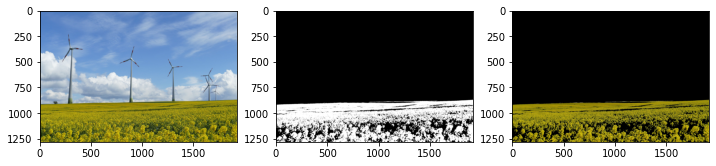

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))


plt.show()

## bitwise in 3 Color image

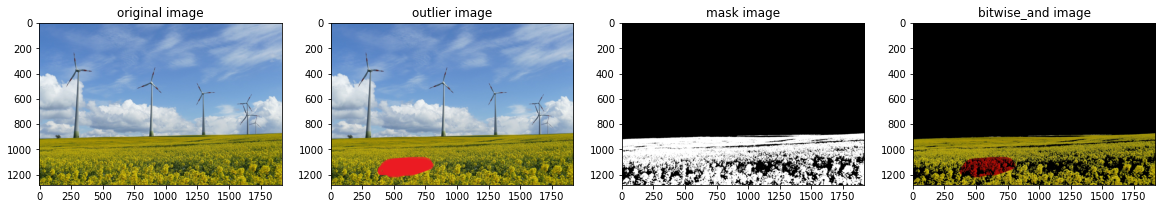

In [ ]:
res_and = cv.bitwise_and(img,img_test, mask= mask)
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('original image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.title('outlier image')
plt.imshow(cv.cvtColor(img_test, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.title('mask image')
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.title('bitwise_and image')
plt.imshow(cv.cvtColor(res_and, cv.COLOR_BGR2RGB))
plt.show()

* bitwise_and<br/>
1. mask 영역에서 서로 공통으로 겹치는 부분 출력


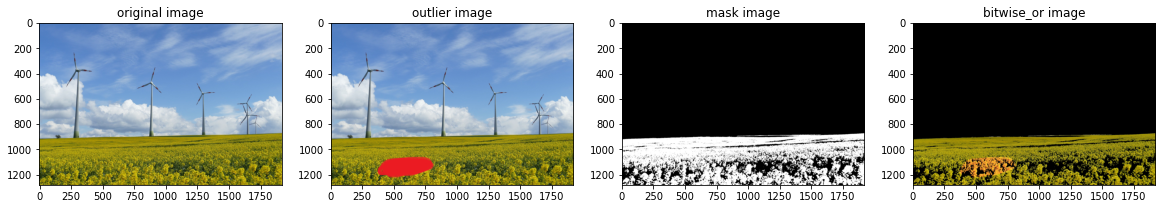

In [ ]:
res_and = cv.bitwise_or(img,img_test, mask= mask)
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('original image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.title('outlier image')
plt.imshow(cv.cvtColor(img_test, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.title('mask image')
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.title('bitwise_or image')
plt.imshow(cv.cvtColor(res_and, cv.COLOR_BGR2RGB))
plt.show()

* bitwise_or
1. mask 영역의 두 이미지를 합쳐버림 
2. 말 그대로 더해버리기 때문에 outlier의 빨간색은 상대적으로 옅게 나옴 <br/>(노랑색에 이미 빨강이 있기 때문에 더해봤자 빨간 빛만 돌 뿐 빨간색으로 바뀌진 않음)

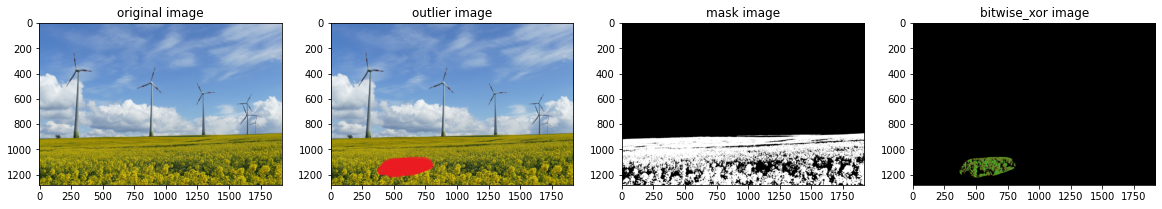

In [ ]:
res_and = cv.bitwise_xor(img_test,img, mask= mask)
res_and2 = cv.bitwise_xor(img,img_test, mask= mask)
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.title('original image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.title('outlier image')
plt.imshow(cv.cvtColor(img_test, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.title('mask image')
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.title('bitwise_xor image')
plt.imshow(cv.cvtColor(res_and, cv.COLOR_BGR2RGB))
plt.show()

* bitsise_xor<br/>
1. XOR --> (0,0) --> 0 / (1,1) --> 0 / 서로 다른부분 --> 출력
이 경우 R값이 
3. 노란색(moriginal) - 빨강색(outlier) = (초록+빨강) - (빨강) = 초록색
<br/>서로 같은 부분인 빨강 제거


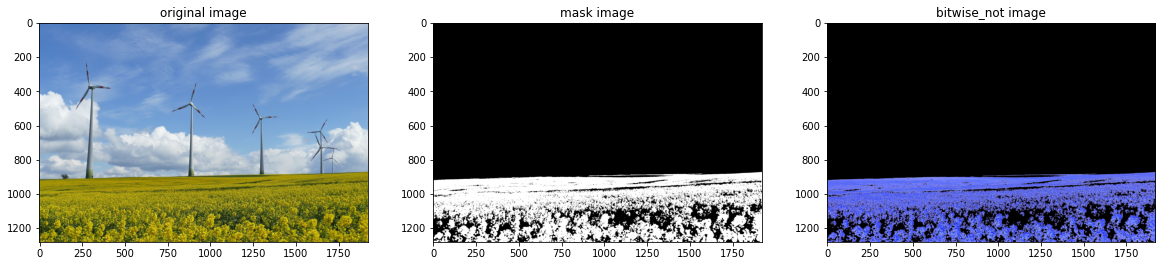

In [ ]:
res_and = cv.bitwise_not(img,mask= mask)
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title('original image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(132)
plt.title('mask image')
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.subplot(133)
plt.title('bitwise_not image')
plt.imshow(cv.cvtColor(res_and, cv.COLOR_BGR2RGB))
plt.show()

* bitwise_not
1. NOT function flips pixel values --> mask영역에서의 보색 출력